In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

from scipy.stats.mstats import normaltest


In [14]:
df=pd.read_csv('data_stocks.csv')

In [15]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [17]:
df1=df.copy()
df1['DATE']=pd.to_datetime(df1.DATE,unit='s')

In [18]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [22]:
df1['MONTH']=pd.to_datetime(df1.DATE).dt.date

In [23]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,MONTH
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03


In [24]:
stock_features=['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list=['MONTH']+stock_features
df2=df1[col_list]
df2.head()

,MONTH,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [25]:
df2.tail()

,MONTH,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
41261,2017-08-31,164.11,106.565,100.89,32.185,36.135
41262,2017-08-31,164.12,106.590,100.88,32.200,36.130
41263,2017-08-31,164.01,106.520,100.86,32.200,36.130
41264,2017-08-31,163.88,106.400,100.83,32.195,36.120
41265,2017-08-31,163.98,106.470,100.89,32.225,36.130


In [26]:
df2.set_index('MONTH', inplace=True)

In [27]:
df2.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
MONTH,,,,,
2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


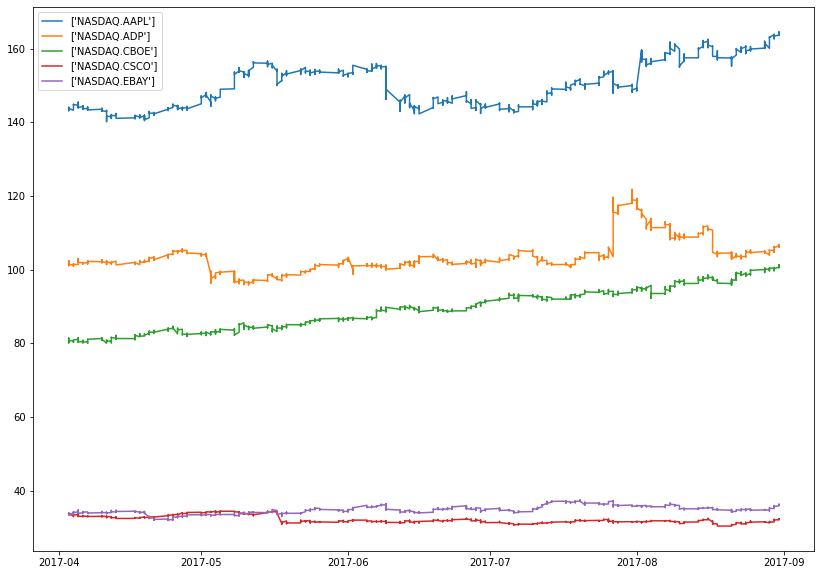

In [42]:
plt.figure(figsize=(14,10))
plt.plot(df2['NASDAQ.AAPL'],label=['NASDAQ.AAPL'])
plt.plot(df2['NASDAQ.ADP'],label=['NASDAQ.ADP'])
plt.plot(df2['NASDAQ.CBOE'],label=['NASDAQ.CBOE'])
plt.plot(df2['NASDAQ.CSCO'],label=['NASDAQ.CSCO'])
plt.plot(df2['NASDAQ.EBAY'],label=['NASDAQ.EBAY'])
plt.legend(loc='best')


Text(0.5, 1.0, 'Time Series for NASDAQ AAPL')

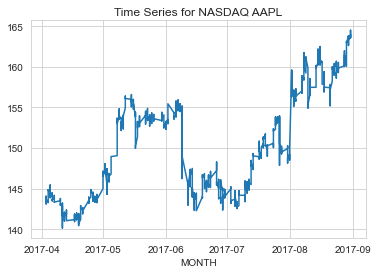

In [47]:
import seaborn as sns
sns.set_style('whitegrid')
df2['NASDAQ.AAPL'].plot()
plt.title('Time Series for NASDAQ AAPL')

In [46]:
df2['NASDAQ.AAPL'].index

Index([2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03,
       2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03,
       ...
       2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31,
       2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31],
      dtype='object', name='MONTH', length=41266)

In [48]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


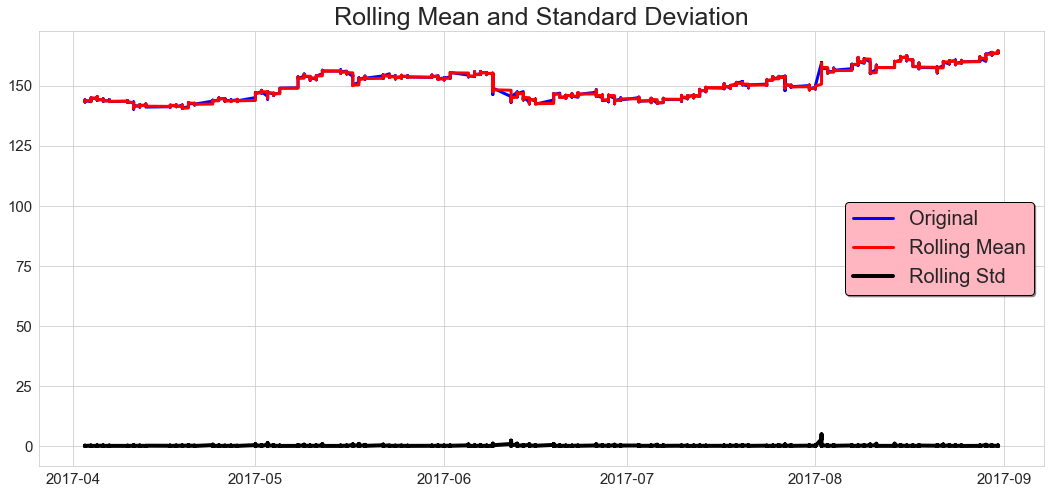

Results of dickey fuller test
Test Statistics                   -0.912853
p-value                            0.783710
No. of lags used                  31.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [49]:
test_stationarity(df2['NASDAQ.AAPL'])

In [50]:
AAPL_diff1=df2['NASDAQ.AAPL'].diff()

In [51]:
AAPL_diff1.dropna(inplace=True)

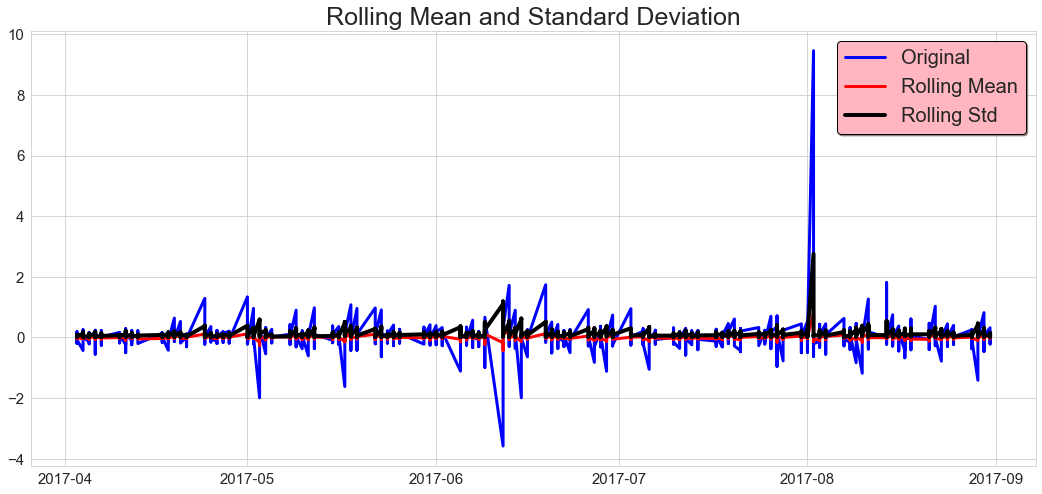

Results of dickey fuller test
Test Statistics                  -35.737741
p-value                            0.000000
No. of lags used                  30.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [54]:
test_stationarity(AAPL_diff1)

<Figure size 864x864 with 0 Axes>

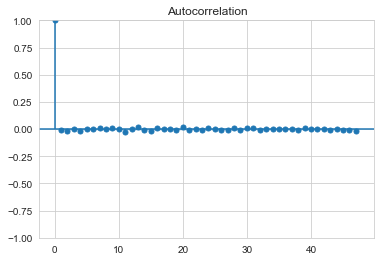

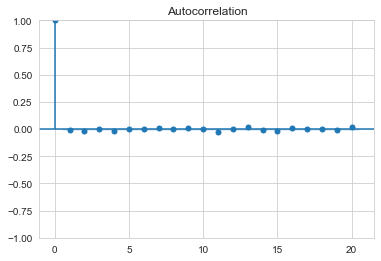

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,12))
fig = plot_acf(AAPL_diff1)
fig = plot_acf(AAPL_diff1,lags=20)

In [100]:
df2['NASDAQ.AAPL']

MONTH
2017-04-03    143.6800
2017-04-03    143.7000
2017-04-03    143.6901
2017-04-03    143.6400
2017-04-03    143.6600
                ...   
2017-08-31    164.1100
2017-08-31    164.1200
2017-08-31    164.0100
2017-08-31    163.8800
2017-08-31    163.9800
Name: NASDAQ.AAPL, Length: 41266, dtype: float64

In [101]:
train_data=df2['NASDAQ.AAPL'][0:41256]

In [110]:
df2['NASDAQ.AAPL']

MONTH
2017-04-03    143.6800
2017-04-03    143.7000
2017-04-03    143.6901
2017-04-03    143.6400
2017-04-03    143.6600
                ...   
2017-08-31    164.1100
2017-08-31    164.1200
2017-08-31    164.0100
2017-08-31    163.8800
2017-08-31    163.9800
Name: NASDAQ.AAPL, Length: 41266, dtype: float64

In [102]:
test_data=df2['NASDAQ.AAPL'][41256:]

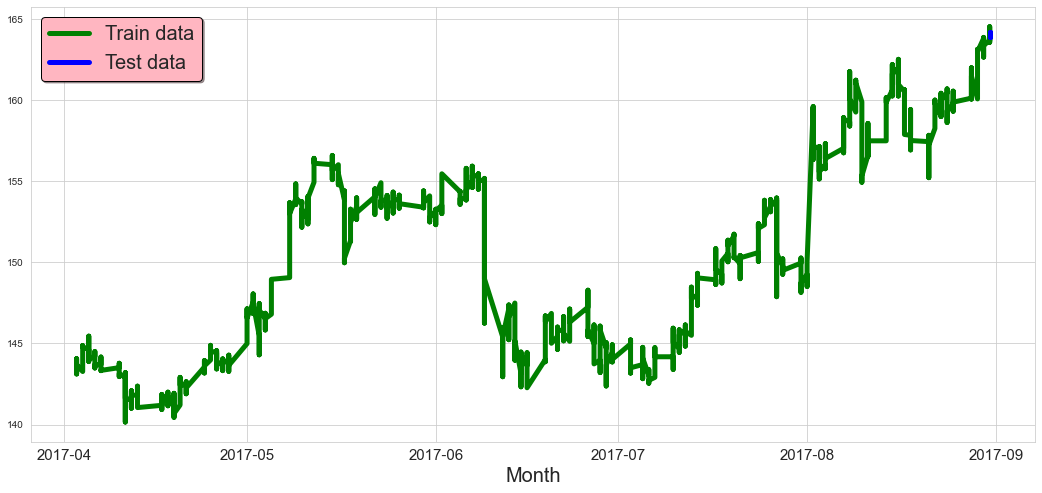

In [103]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Month', fontsize = 20)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [127]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output=model_fit.forecast()
    predictions.append(output)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 0.08430976608761648


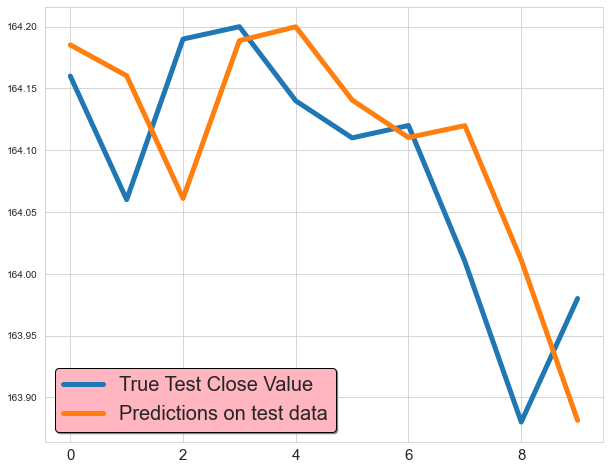

In [124]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [112]:
model1 = sm.tsa.arima.ARIMA(df2['NASDAQ.AAPL'] , order=(1,1,0))
model_fit1 = model.fit()

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [138]:
df3=df2.copy()

# SARIMAX

In [126]:
sarmodel=sm.tsa.statespace.SARIMAX(df2['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0,1,0,12))
newresult=sarmodel.fit()

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='MONTH'>

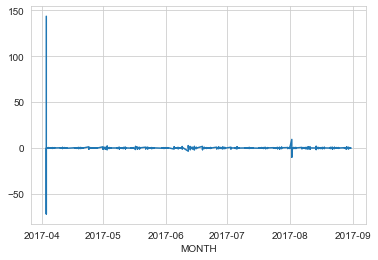

In [128]:
newresult.resid.plot()

In [129]:
df3['Forecast']=newresult.predict()

<AxesSubplot:xlabel='MONTH'>

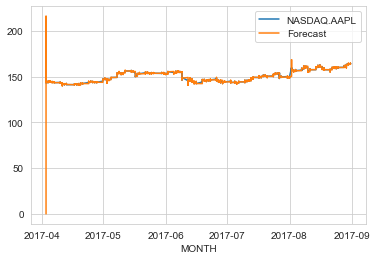

In [134]:
df3[['NASDAQ.AAPL','Forecast']].plot()

In [135]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 0.08458998299914512


In [140]:
newresult.forecast(steps=10)

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


41266    163.960
41267    163.935
41268    163.910
41269    163.810
41270    163.940
41271    163.950
41272    163.890
41273    163.860
41274    163.870
41275    163.760
Name: predicted_mean, dtype: float64